# Binary Image Classification: Dogs and Cats

This notebook documents an approach to the binary classification of images of Dogs and Cats utilizing the best practices of the fast.ai libraries built on top of PyTorch. The approach will start with a ResNet convolutional model pre-trained on the ImageNet dataset. Additional/final dense layers are appended to the base convolutional layers. This particular notebook borrows heavily from fast.ai's Lesson 1 Notebook. 

*Author*: ksferguson (K. Scott Ferguson)

*Type*: Deep Learning

*Stack*: fast.ai over pyTorch

*Pattern*: Binary Image Classification

*Problem*: Identify whether image is dog or cat

## fast.ai Best Practices 

### Steps to train a world-class image classifier 
(adapted from Lesson 1 Notebook, references at end)

0. Use pretrained ImageNet model to start (where reasonable size match, etc)
1. Set precompute=True (precomputes activations once for initial layers, for initial speed only)
2. Use lr_find() to find highest learning rate where loss is still clearly improving
3. Train last layer from precomputed activations for 1-2 epochs
4. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
5. Unfreeze all layers
6. Set earlier layers to 3x-10x lower learning rate than next higher layer
7. Use lr_find() again
8. Train full network with cycle_mult=2 until over-fitting

## Machine & Notebook Setup Notes

Notebook work is primarily executed on PaperSpace fast.ai template on an 8 CPU, Quadro P5000 GPU, 30 GB RAM machine. Alternatively, a Dell 7759 w GTX 960M was similarly configured although this was a complex and iterative, systems configuration task. Use of PaperSpace is highly encouraged.

* Ubuntu Setup Notes for Dell 7559 with GTX 960M: https://gist.github.com/ksferguson/a6eba79df658826cacb629dcc14992eaPaperSpace 
* fast.ai PaperSpace Setup Notes: https://gist.github.com/ksferguson/0b384e892689617d1539d35c1254eb01 

### fast.ai prelims
Ported largely unchanged.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

### Data Prelims

This problem utilizes one of the fast.ai supported data patterns, based on directory paths (as opposed to e.g. a .csv file with appropriate training set/target label attributes). 

With this pattern, the expectation is that a data directory exists "data/dogscats/". Under this folder, there are e.g. "train" and "valid" folders each with a subdirectory for "dogs" and also one for "cats". Hence the target labels are read off the folder geometry.

An initial image size sz is also set to 224 pixels (square, i.e. 224 x 224 or ~50K pixels x 3 color channels for an input tensor with 150,528 data points).

Note: The "data" folder can be a symbolic link inside the repo so that it actually lives outside of the github.com repo.

In [6]:
PATH = "data/dogscats/"
sz=224

In [7]:
os.listdir(PATH)

['sample', 'valid', 'models', 'train', 'tmp', 'test1']

In [8]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [10]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.11341.jpg',
 'cat.3869.jpg',
 'cat.5089.jpg',
 'cat.7380.jpg',
 'cat.11409.jpg']

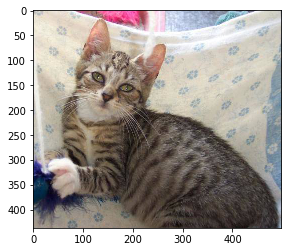

In [11]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [13]:
img.shape

(437, 499, 3)

In [14]:
img[:4,:4]

array([[[211, 211, 219],
        [210, 211, 216],
        [208, 207, 213],
        [202, 201, 206]],

       [[200, 201, 206],
        [199, 198, 204],
        [196, 195, 200],
        [193, 192, 197]],

       [[193, 192, 197],
        [189, 188, 193],
        [184, 183, 188],
        [185, 185, 187]],

       [[197, 195, 198],
        [189, 187, 190],
        [181, 179, 180],
        [183, 181, 182]]], dtype=uint8)

In [15]:
files = os.listdir(f'{PATH}valid/dogs')[:5]
files

['dog.2851.jpg',
 'dog.8500.jpg',
 'dog.7275.jpg',
 'dog.6665.jpg',
 'dog.1150.jpg']

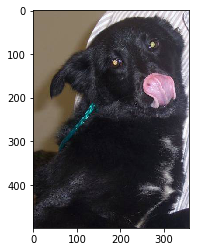

In [16]:
img = plt.imread(f'{PATH}valid/dogs/{files[0]}')
plt.imshow(img);

In [17]:
img.shape

(499, 357, 3)

## 0. Use pretrained ImageNet model to start (where reasonable size match, etc)



## 1. Set precompute=True (precomputes activations once for initial layers, for initial speed only)



## 2. Use lr_find() to find highest learning rate where loss is still clearly improving



## 3. Train last layer from precomputed activations for 1-2 epochs



## 4. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1



## 5. Unfreeze all layers



## 6. Set earlier layers to 3x-10x lower learning rate than next higher layer



## 7. Use lr_find() again



## 8. Train full network with cycle_mult=2 until over-fitting



In [19]:
##

In [20]:
## 

fast.ai Deep Learning Course 1:
  * Lesson 1 Notebook, Image classification with Convolutional Neural Networks, https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1.ipynb
  * Lesson 2 Notebook, Multi-label classification, https://github.com/fastai/fastai/blob/master/courses/dl1/lesson2-image_models.ipynb
  * Lesson 1 Video, Recognizing Cats & Dogs, http://course.fast.ai/lessons/lesson3.html 
  * Lesson 2 Video, Convolutional Nueral Networks, http://course.fast.ai/lessons/lesson3.html 
  * Lesson 3 Video, Improving Your Image Classifier, http://course.fast.ai/lessons/lesson3.html 
  
References:
  * [ ] insert refs

Datasets/Competitions:
  * https://www.kaggle.com/c/dogs-vs-cats
  * https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition (same data set as original)
  * https://www.kaggle.com/c/kmlc-challenge-1-cats-vs-dogs/data (new Google data set) 
    
